# Assignment 3
### Due 9/21. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/breelumpkin/Desktop/Understanding Uncertainty/data/nhanes_data_17_18.csv') 
df

/var/folders/05/yl9fl68j76b3vvcg1n15b0_40000gn/T/ipykernel_48970/3641628475.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/breelumpkin/Desktop/Understanding Uncertainty/data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
8362,102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
8363,102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never
8364,102955.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['GeneralHealthCondition_na'] = df['EverBreastfedOrFedBreastmilk'].isna()
df['GeneralHealthCondition_na'].value_counts()

GeneralHealthCondition_na
True     7297
False    1069
Name: count, dtype: int64

In [4]:
df['EverBreastfedOrFedBreastmilk'].value_counts()

EverBreastfedOrFedBreastmilk
1.0    862
0.0    207
Name: count, dtype: int64

In [5]:
pd.crosstab(df['GeneralHealthCondition_na'], df['EverBreastfedOrFedBreastmilk'])

EverBreastfedOrFedBreastmilk,0.0,1.0
GeneralHealthCondition_na,,
False,207,862


In [6]:
df['GeneralHealthCondition'].isna().sum()

np.int64(2402)

There is 2402 missing vales in this row

In [7]:
df['EverBreastfedOrFedBreastmilk'].isna().sum()

np.int64(7297)

There is 7297 missing values in this row 

This is a very large survey. There are alot of missing values due to every respondent not being asked every single question. 

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [8]:
df['CurrentSelfreportedWeightPounds'].isna().sum()
df['GeneralHealthCondition'].isna().sum()
print(df['CurrentSelfreportedWeightPounds'].isna().sum())
print(df['GeneralHealthCondition'].isna().sum())

2538
2402


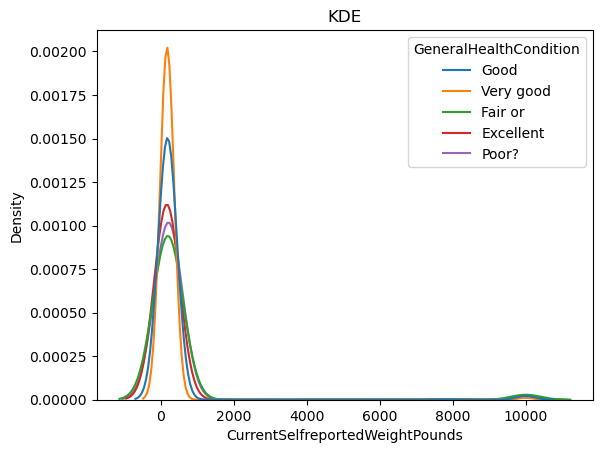

In [9]:
import seaborn as sns
conditioner = 'GeneralHealthCondition'
sns.kdeplot( data=df, x='CurrentSelfreportedWeightPounds', hue=conditioner, common_norm=False ).set(title='KDE')
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8366 entries, 0 to 8365
Columns: 199 entries, SEQN to GeneralHealthCondition_na
dtypes: bool(1), float64(162), object(36)
memory usage: 12.6+ MB


In [11]:
df.pivot_table(index='GeneralHealthCondition', values='CurrentSelfreportedWeightPounds', aggfunc=["mean", "median","std"])

,mean,median,std
,CurrentSelfreportedWeightPounds,CurrentSelfreportedWeightPounds,CurrentSelfreportedWeightPounds
GeneralHealthCondition,,,
Excellent,315.410000,158.0,1204.831420
Fair or,483.822751,185.0,1664.206135
Good,334.106101,175.0,1202.150398
Poor?,321.798817,196.0,1064.212601
Very good,238.725592,165.0,809.140090


The KDE curves sit on top of each other. That says that the typical self-reported weight distribution is very similar across health-rating groups. The pivot table backs uo the medians. The means and standard deviations are huge because there are very large outliars. For example 10,000+ pounds which is a data error and its causing the means to go way up. 

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [12]:
df5 = df[df["CurrentSelfreportedWeightPounds"] < 1000]

This step was implemented to remove extremely unrealistic values, such as a reported weight of 10,000 pounds, since it’s clear those entries represent flawed or inaccurate data.

Computed bandwidth is: 5246.677082804203


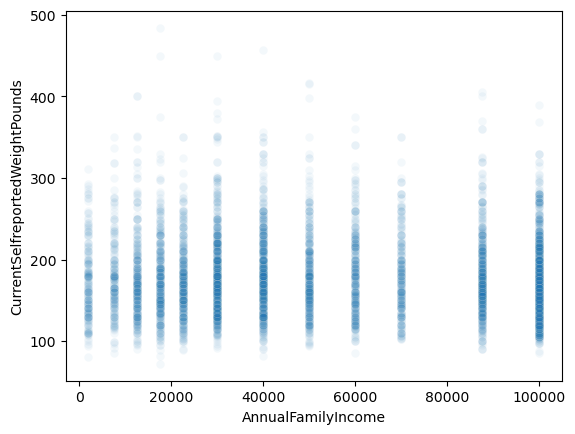

In [18]:
x = df5['AnnualFamilyIncome']
y = df5['CurrentSelfreportedWeightPounds']

def lcls(x,y, h = None, plot=True):
    ''' Computes local constant least squares regression estimates with Gaussian kernel. '''

    n = len(x) # Number of observations
    grid = np.sort(x.unique()) # Extract and sort unique values for x

    # Compute bandwidth, if none provided:
    if h is None:
        iqr = np.quantile(x,.75) - np.quantile(x,.25)
        h = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
        print(f'Computed bandwidth is: {h}')

    # Compute kernel:
    I = -(x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) )**2
    K = np.exp(I/(2*h**2) )/np.sqrt(2*np.pi*h**2 )

    # Compute LCLS estimator:
    numerator = y@K # Compute the numerator
    denominator = np.sum(K,axis=0) # Compute denominator
    y_hat = numerator/denominator # Compute estimator

    # Plot results:
    if plot:
        sns.scatterplot(data=df5, y='CurrentSelfreportedWeightPounds', x='AnnualFamilyIncome',alpha=.05)
        sns.lineplot(x=grid,y=y_hat, color='orange')

    return y_hat, grid

y_hat, grid = lcls(x,y)

Looking at my scatterplot, I don’t see a real link between annual family income and self-reported weight. Across income levels the points sit in the same 100–300 lb band. A few extreme weights pop up at all incomes, which adds noise. In this dataset, income isn’t doing much to predict weight.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

In [ ]:
df_ames = pd.read_csv('/Users/breelumpkin/Desktop/Understanding Uncertainty/data/ames_prices.csv')
df

,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight,GeneralHealthCondition_na
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more,True
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never,True
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never,True
8362,102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never,True
8363,102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never,True
8364,102955.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


,price
area,
334,39300.0
407,46500.0
438,60000.0
480,35311.0
492,61500.0
...,...
4316,755000.0
4476,745000.0
4676,184750.0


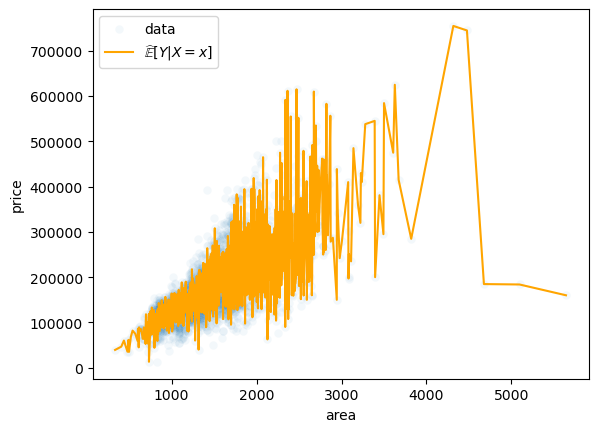

In [ ]:
means = df_ames.loc[:,['price','area']].groupby('area').mean()
sns.scatterplot(data=df_ames, y='price', x='area',alpha=.05, label='data')
sns.lineplot(data=means, x='area',y='price',color='orange', label='$\\widehat{\\mathbb{E}}[Y|X=x]$')

means

You can still predict Y from X without proving cause and effect. Prediction only needs patterns in the data. As long as your future data comes from the same kind of setting as your training data and you’re not using the model to change the system, that’s fine. Causality is for “what if we set X to this value?” prediction is just about making good guesses from observed relationships.